<div style="display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:210%;
            font-family:sans-serif;
            letter-spacing:0.5px;
            padding:10px;
            color:white;
            border-style: solid;
            border-color: black;
            text-align:center;">
<b>
 👨‍🔬 In-Depth 10 Regressors to Predict Data Science Salary 💰</b></div>

This notebook will show **10 diversified regressors** made up with parametric, non-parametric and ensemble learning methods to predict on data science salary. It will also show **Nested Grid Search** to tuned the pre-processor along with the estimator parameters. Besides, several visualisation idioms, such as **Bar of Pie and Residual Plots** will also be depicted. The best model pipeline can be retrieved at the end to make a final prediction. Hope you enjoy reading this, if you find this notebook useful, please **upvote and comment**. Thank you.

Author: Morris Lee <br>
Date: 4-9-2022

#### [1.0 Preprocessing Part](#1.0)
* [1.1 Import Packages and Define Useful Functions](#1.1)
* [1.2 Inspect Duplications](#1.2)
* [1.3 🎨 Inspect Value Counts](#1.3)
* [1.4 Get GDP Per Capita](#1.4)
* [1.5 Add New Columns](#1.5)
* [1.6 🎨 Bar of Pie Chart](#1.6)
* [1.7 Reduce Dimension of Job Title](#1.7)
* [1.8 Distinguish Categorical and Numerical](#1.8)
* [1.9 One Hot Encode](#1.9)
* [1.10 🎨 Plot Distributions](#1.10)
    
#### [2.0 Modelling Part](#2.0)
* [2.1 Import Modelling Packages](#2.1)
* [2.2 Define Nested Grid Search Functions](#2.2)
* [2.3 Define Residual Plotting Functions](#2.3)
* [2.4 ⭐ Modelling - 10 Models - Training + Evaluations](#2.4)
* [2.5 Concatenate Results](#2.5)
* [2.6 Get Overall Best Results](#2.6)
* [2.7 Make a Final Prediction](#2.7)

# <b>1.0 <span style='color:red'>|</span> Pre-Processing Part</b> <a class="anchor" id="1.0"></a>

# <b>1.1 <span style='color:red'>|</span> Import Packages and Define Useful Functions </b> <a class="anchor" id="1.1"></a>

Let's import several useful functions that will use in this notebook:
1. def vc - to pretty show the value counts of a column
2. def shape - to pretty show the dimension of a dataframe


In [4]:
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Circle
import matplotlib
import seaborn as sns

def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')

def vc(df, column, r=False):
    vc_df = df.reset_index().groupby([column]).size().to_frame('count')
    vc_df['percentage (%)'] = vc_df['count'].div(sum(vc_df['count'])).mul(100)
    vc_df = vc_df.sort_values(by=['percentage (%)'], ascending=False)
    if r:
        return vc_df
    else:
        print(f'STATUS: Value counts of "{column}"...')
        display(vc_df)
        
df = pd.read_csv(r"C:\Users\luke1\Desktop\projects\Mastering_Tuning_10_Regressors_0.5_R2\data\ds_salaries.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
display(df.head())
df.info()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


# <b>1.2 <span style='color:red'>|</span> Inspect Duplications </b> <a class="anchor" id="1.2"></a>

There are 42 duplicated rows in the dataframe, let's remove them

In [5]:
num_duplicated = len(df[df.duplicated()])
print(f'STATUS: There are {num_duplicated} duplicated rows')
shape(df,'df')
df = df.drop_duplicates()
shape(df,'After removing duplicates')
df.head()

STATUS: There are 42 duplicated rows
STATUS: Dimension of "df" = (607, 11)
STATUS: Dimension of "After removing duplicates" = (565, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# <b>1.3 <span style='color:red'>|</span> Inspect Value Counts </b> <a class="anchor" id="1.3"></a>

Let's study the value counts of the dataframe. In order to easy knowing the labels meaning, the shortforms have replaced to more explicit meaningful words. Asides of showing the value counts, we can plot the donut chart... Sounds delicious :p

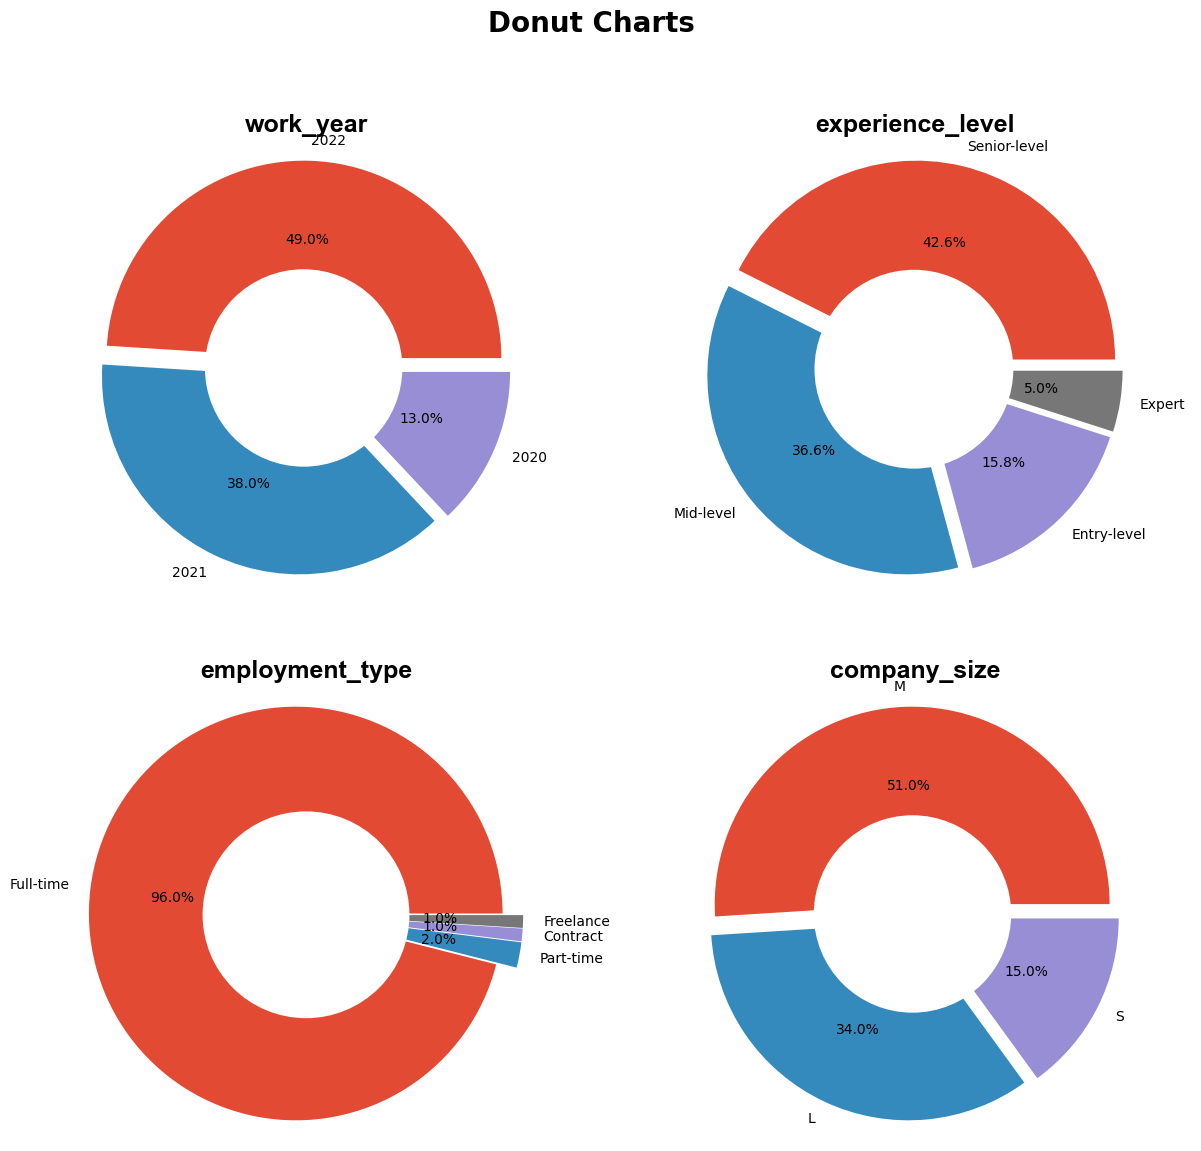

STATUS: Value counts of "work_year"...


,count,percentage (%)
work_year,,
2022,278,49.203540
2021,215,38.053097
2020,72,12.743363


STATUS: Value counts of "experience_level"...


,count,percentage (%)
experience_level,,
Senior-level,243,43.008850
Mid-level,208,36.814159
Entry-level,88,15.575221
Expert,26,4.601770


STATUS: Value counts of "employment_type"...


,count,percentage (%)
employment_type,,
Full-time,546,96.637168
Part-time,10,1.769912
Contract,5,0.884956
Freelance,4,0.707965


STATUS: Value counts of "job_title"...


,count,percentage (%)
job_title,,
Data Scientist,130,23.008850
Data Engineer,121,21.415929
Data Analyst,82,14.513274
Machine Learning Engineer,39,6.902655
Research Scientist,16,2.831858
Data Science Manager,12,2.123894
Data Architect,11,1.946903
Big Data Engineer,8,1.415929
Machine Learning Scientist,8,1.415929


STATUS: Value counts of "salary_currency"...


,count,percentage (%)
salary_currency,,
USD,359,63.539823
EUR,93,16.460177
GBP,43,7.610619
INR,27,4.778761
CAD,18,3.185841
JPY,3,0.530973
PLN,3,0.530973
TRY,3,0.530973
CNY,2,0.353982


STATUS: Value counts of "employee_residence"...


,count,percentage (%)
employee_residence,,
US,295,52.212389
GB,43,7.610619
IN,30,5.309735
CA,27,4.778761
DE,24,4.247788
FR,18,3.185841
ES,15,2.654867
GR,12,2.123894
JP,7,1.238938


STATUS: Value counts of "company_location"...


,count,percentage (%)
company_location,,
US,318,56.283186
GB,46,8.141593
CA,28,4.955752
DE,27,4.778761
IN,24,4.247788
FR,15,2.654867
ES,14,2.477876
GR,10,1.769912
JP,6,1.061947


STATUS: Value counts of "company_size"...


,count,percentage (%)
company_size,,
M,290,51.327434
L,193,34.159292
S,82,14.513274


In [6]:
df = df.replace({'EN': 'Entry-level', 'SE': 'Senior-level', 'EX':'Expert', 'MI':'Mid-level',
           'PT': 'Part-time', 'FT':'Full-time', 'CT':'Contract', 'FL':'Freelance'})

plt.style.use('ggplot')

def pie(df, column):

    fig, axs = plt.subplots(nrows = 2, ncols = 2)
    fig = matplotlib.pyplot.gcf()
    fig.subplots_adjust(wspace=0.1)
    fig.set_size_inches(15, 13)
    fig.suptitle(f"Donut Charts", fontsize=20,fontweight='bold')
    
    counter = 0
    for i in range(2):
        for j in range(2):
            target = column[counter]
            # Pie chart, where the slices will be ordered and plotted counter-clockwise:
            labels = df[target].value_counts().index.tolist()
            sizes = np.rint(df[target].value_counts().values/ df[target].value_counts().values.sum() *100)
            explode = tuple(np.zeros(len(labels))+0.1)

            axs[i,j].pie(sizes, labels=labels, autopct='%1.1f%%', radius=2, explode = explode)
            axs[i,j].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            axs[i,j].set_title(f'{target}', fontsize=18, fontname="Arial",fontweight='bold')

            #draw circle
            centre_circle = Circle((0,0),1,fc='white')
            axs[i,j].add_patch(centre_circle)
            
            counter+=1

    return plt.show()

pie(df, ['work_year','experience_level','employment_type','company_size'])



categorical = ['work_year', 'experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size']
for col in categorical:
    vc(df,col)

# <b>1.4 <span style='color:red'>|</span> Get GDP Per Capita </b> <a class="anchor" id="1.4"></a>

Here is a interesting one, gdp per capita information has obtained from other kaggle dataset. The objective is to merge back to the main dataframe to make it more meaningful.

In [7]:
url = 'https://raw.githubusercontent.com/k-w-lee/kaggle-file/main/gdp_per_capita.csv'
gdp_per_capita = pd.read_csv(url)
gdp_per_capita = gdp_per_capita[['Country','2018']]
gdp_per_capita.columns = ['country','gdp_per_capita']
gdp_per_capita['gdp_per_capita']=pd.to_numeric(gdp_per_capita['gdp_per_capita'],errors='coerce')
gdp_per_capita

,country,gdp_per_capita
0,Afghanistan,1746.0
1,Albania,12300.0
2,Algeria,13639.0
3,Andorra,48641.0
4,Angola,5555.0
...,...,...
203,Sub-Saharan Africa,3443.0
204,Least Developed Countries,2630.0
205,Small Island Developing States,15553.0
206,Organization for Economic Co-operation and Dev...,40615.0


# <b>1.5 <span style='color:red'>|</span> Add New Columns </b> <a class="anchor" id="1.5"></a>

Here is a bunch of pre-processing concentrate in one kernel. To summarise, 6 new columns have been added to further process the data. Eventually, several redundant columns were then dropped
 

In [8]:
shape(df,'df before added columns')
# to get country name for employee residence
df['employee_residence_name'] = df.apply(lambda x: pycountry.countries.get(alpha_2 =x['employee_residence']).name \
                                         if (pycountry.countries.get(alpha_2 =x['employee_residence']) is not None) \
                                         else 'None' ,axis=1)
print("STATUS: Added column employee_residence_name")

# to get country name for company residence
df['company_location_name'] = df.apply(lambda x: pycountry.countries.get(alpha_2 =x['company_location']).name \
                                         if (pycountry.countries.get(alpha_2 =x['company_location']) is not None) \
                                         else 'None' ,axis=1)
print("STATUS: Added column company_location_name")

# to get company's country gdp per capita
df2 = df.merge(gdp_per_capita, how='left', left_on='company_location_name', right_on = 'country')
df2.rename(columns = {'gdp_per_capita': 'gdp_per_capita_company'}, inplace=True)
df2.drop('country', inplace=True, axis=1)
print("STATUS: Added column company's country gdp per capita")

# to get residence's country gdp per capita
df2 = df2.merge(gdp_per_capita, how='left', left_on='employee_residence_name', right_on = 'country')
df2.drop('country', inplace=True, axis=1)
df2.rename(columns = {'gdp_per_capita': 'gdp_per_capita_residence'}, inplace=True)
print("STATUS: Added column residence's country gdp per capita")

# is the working country same as residence country?
df2['same_working_country'] = df2.apply(lambda x:  'Local Worker' if x['company_location_name'] == x['employee_residence_name'] else 'Expatriate', axis=1)
print("STATUS: Added column same_working_country")

# is the working country gdp per capita same as residence country?
df2['went_high_went_low_gdp_capita'] = df2.apply(lambda x:  'Went Higher GDP per Capita' if x['gdp_per_capita_company'] > x['gdp_per_capita_residence'] else ('Went Lower GDP per Capita' if x['gdp_per_capita_company'] < x['gdp_per_capita_residence'] else 'Same'), axis=1)
print("STATUS: Added column went_high_went_low_gdp_capita")

shape(df2,'Before drop NA')
# dropna for those country code can't be captured
df2=df2.dropna()

pycountry.currencies.get(alpha_3='ARS')

# drop redundant columns
to_drop = ['employee_residence_name', 'company_location_name','employee_residence',\
           'company_location','salary_currency','salary']
df2 = df2.drop(to_drop, axis=1)
print(f"STATUS: Dropped {to_drop}")

shape(df2,'After drop NA')
df2

STATUS: Dimension of "df before added columns" = (565, 11)
STATUS: Added column employee_residence_name
STATUS: Added column company_location_name
STATUS: Added column company's country gdp per capita
STATUS: Added column residence's country gdp per capita
STATUS: Added column same_working_country
STATUS: Added column went_high_went_low_gdp_capita
STATUS: Dimension of "Before drop NA" = (565, 17)
STATUS: Dropped ['employee_residence_name', 'company_location_name', 'employee_residence', 'company_location', 'salary_currency', 'salary']
STATUS: Dimension of "After drop NA" = (549, 11)


,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,gdp_per_capita_company,gdp_per_capita_residence,same_working_country,went_high_went_low_gdp_capita
0,2020,Mid-level,Full-time,Data Scientist,79833,0,L,46946.0,46946.0,Local Worker,Same
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,0,S,40799.0,40799.0,Local Worker,Same
2,2020,Senior-level,Full-time,Big Data Engineer,109024,50,M,39507.0,39507.0,Local Worker,Same
3,2020,Mid-level,Full-time,Product Data Analyst,20000,0,S,4258.0,4258.0,Local Worker,Same
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,50,L,56140.0,56140.0,Local Worker,Same
...,...,...,...,...,...,...,...,...,...,...,...
560,2022,Senior-level,Full-time,Data Engineer,154000,100,M,56140.0,56140.0,Local Worker,Same
561,2022,Senior-level,Full-time,Data Engineer,126000,100,M,56140.0,56140.0,Local Worker,Same
562,2022,Senior-level,Full-time,Data Analyst,129000,0,M,56140.0,56140.0,Local Worker,Same
563,2022,Senior-level,Full-time,Data Analyst,150000,100,M,56140.0,56140.0,Local Worker,Same


# <b>1.6 <span style='color:red'>|</span> Bar of Pie Chart </b> <a class="anchor" id="1.6"></a>


This section will answer questions like: Is there any expatriate in the dataset? If Yes, are they going to a country with higher GDP per Capita or Lower? How is the distribution? Let Bar of Pie answer you this question. :)

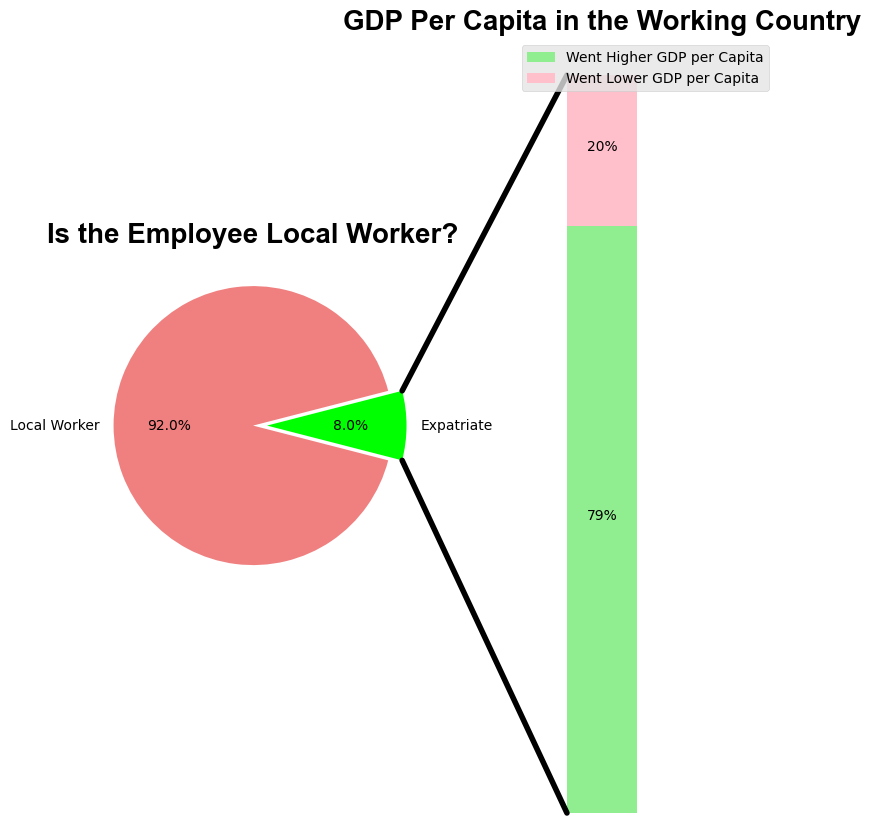

In [9]:
# make figure and assign axis objects

def pie_bar(ratios_pie, labels_pie, ratios_bar, labels_bar_tuple, colors_list, color_bar,bar_title,pie_title):
    fig = plt.figure(figsize=(9, 10.0625))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    fig.subplots_adjust(wspace=0)

    # pie chart parameters
    ratios = ratios_pie
    labels = labels_pie
    explode = [0.1, 0]
    # rotate so that first wedge is split by the x-axis
    angle = -180 * ratios[0]
    ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
            labels=labels, explode=explode, colors = colors_list)
    ax1.set_title(pie_title, fontsize=20, fontname="Arial",fontweight='bold')
    # bar chart parameters
    xpos = 0
    bottom = 0
    ratios = ratios_bar
    width = .2
    colors = color_bar

    for j in range(len(ratios)):
        height = ratios[j]
        ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
        ypos = bottom + ax2.patches[j].get_height() / 2
        bottom += height
        ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
                 ha='center')

    ax2.set_title(bar_title, fontsize=20, fontname="Arial",fontweight='bold')
    ax2.legend(labels_bar_tuple, loc='upper right')
    ax2.axis('off')
    ax2.set_xlim(- 2.5 * width, 2.5 * width)

    # use ConnectionPatch to draw lines between the two plots
    # get the wedge data
    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    bar_height = sum([item.get_height() for item in ax2.patches])

    # draw top connecting line
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                          coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0, 0, 0])
    con.set_linewidth(4)
    ax2.add_artist(con)

    # draw bottom connecting line
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                          coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0, 0, 0])
    ax2.add_artist(con)
    con.set_linewidth(4)

    return plt.show()


labels_pie = df2.same_working_country.value_counts(normalize=True).index.tolist()
ratios_pie = df2.same_working_country.value_counts(normalize=True).tolist()

# TO REVERSE THE PIE CHART TO CORRECT POSITION
ratios_pie.insert(0, ratios_pie.pop(1))
labels_pie.insert(0, labels_pie.pop(1))

ratios_bar = df2[df2.same_working_country == 'Expatriate'].went_high_went_low_gdp_capita.value_counts(normalize=True).tolist()
labels_bar_tuple = tuple(df2[df2.same_working_country =='Expatriate'].went_high_went_low_gdp_capita.value_counts(normalize=True).index.tolist())
color_bar = ['lightgreen', 'pink','skyblue']
color_pie = ['lime', 'lightcoral']
pie_bar(ratios_pie, labels_pie, ratios_bar, labels_bar_tuple, color_pie, color_bar, "GDP Per Capita in the Working Country",'Is the Employee Local Worker?')

# <b>1.7 <span style='color:red'>|</span> Reduce Dimension of Job Title </b> <a class="anchor" id="1.7"></a>


The 'job_title' column is further pre-process to reduce number of unique values. I discover there are many values not necessarily to be unique, hence they are merged together. The detailes are summarised in kernel below.

In [10]:
df2 = df2.replace({'ML Engineer': 'Machine Learning Engineer', 
                   'BI Data Analyst' : 'Big Data Engineer', 
                   'Data Analytics Engineer': 'Data Analyst', 
                   'Head of Machine Learning':'Machine Learning Manager', 
                   'Lead Machine Learning Engineer':'Machine Learning Manager',
                   'Staff Data Scientist':'Data Scientist',
                   'Big Data Architect':'Big Data Engineer',
                   'Data Analytics Lead':'Data Analytics Manager', 
                   'Lead Data Scientist':'Head of Data Science',
                   'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                   'Data Specialist':'Data Scientist',
                   'Marketing Data Analyst':'Data Analyst',
                   'Finance Data Analyst':'Data Analyst',
                   'Financial Data Analyst':'Data Analyst',
                   'Product Data Analyst':'Data Analyst',
                   '3D Computer Vision Researcher':'Computer Vision Engineer',
                   'Computer Vision Software Engineer':'Computer Vision Engineer',
                   'NLP Engineer':'Data Scientist',
                   'Applied Machine Learning Scientist': 'Machine Learning Engineer', 
                   'ETL Developer':'Data Architect','Principal Data Analyst':'Lead Data Analyst'})

searchfor = ['Head', 'Lead', 'Manager','Director','Principal']
is_managerial = df2['job_title'].str.contains('|'.join(searchfor))
df2['is_managerial'] = np.where(is_managerial, True, False)

display(df2.head())
vc(df2,'job_title')

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,gdp_per_capita_company,gdp_per_capita_residence,same_working_country,went_high_went_low_gdp_capita,is_managerial
0,2020,Mid-level,Full-time,Data Scientist,79833,0,L,46946.0,46946.0,Local Worker,Same,False
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,0,S,40799.0,40799.0,Local Worker,Same,False
2,2020,Senior-level,Full-time,Big Data Engineer,109024,50,M,39507.0,39507.0,Local Worker,Same,False
3,2020,Mid-level,Full-time,Data Analyst,20000,0,S,4258.0,4258.0,Local Worker,Same,False
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,50,L,56140.0,56140.0,Local Worker,Same,False


STATUS: Value counts of "job_title"...


,count,percentage (%)
job_title,,
Data Scientist,132,24.043716
Data Engineer,117,21.311475
Data Analyst,92,16.757741
Machine Learning Engineer,48,8.743169
Research Scientist,14,2.550091
Big Data Engineer,14,2.550091
Data Architect,12,2.185792
Data Science Manager,12,2.185792
Computer Vision Engineer,9,1.639344


# <b>1.8 <span style='color:red'>|</span> Distinguish Categorical and Numerical </b> <a class="anchor" id="1.8"></a>


To easy distinguish CATEGORICAL or NUMERICAL, we can use a function to calculate how many unique values in a column to decide. At here, I put if there is more than 10 unique values, then it will be considered as numerical. In fact, it will also included 'job_title' as numerical, which is incorrect. I purposely put so because later I would like to examine I should use OrdinalEncoding or OneHotEncoding to treat this column can generate a better result. So, I temporarily park it here first. The other categorical columns will be treated with OneHotEncoding. 

In [11]:
df3 = df2.copy()

def get_num_cat_col(df, n):
    numerical_columns = []
    categorical_columns = []
    for col in df.columns:
        len_unique = len(df[col].unique())
        if len_unique <= n:
            categorical_columns.append(col)
        else:
            numerical_columns.append(col)
    return numerical_columns, categorical_columns

num, cat = get_num_cat_col(df2, 10)
print('NUMERICAL', num , '\nCATEGORICAL' ,cat)

NUMERICAL ['job_title', 'salary_in_usd', 'gdp_per_capita_company', 'gdp_per_capita_residence'] 
CATEGORICAL ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size', 'same_working_country', 'went_high_went_low_gdp_capita', 'is_managerial']


# <b>1.9 <span style='color:red'>|</span> One Hot Encode </b> <a class="anchor" id="1.9"></a>


We can define a function to easy implement the one-hot-encoding process, that automatic rename, drop and join the encoded columns. Sound hassle free!

In [12]:
def one_hot_encode(df, column):
    # Get one hot encoding of columns B
    one_hot = pd.get_dummies(df[column]).add_prefix(f'{column}_')
    # Drop column as it is now encoded
    df = df.drop(column,axis = 1)
    print(f"one hot encoded {column}")
    # Join the encoded df
    df = df.join(one_hot)
    return df

for col in cat:
    df3 = one_hot_encode(df3, col)
shape(df3,'After One Hot Encoded')
df3.head()

one hot encoded work_year
one hot encoded experience_level
one hot encoded employment_type
one hot encoded remote_ratio
one hot encoded company_size
one hot encoded same_working_country
one hot encoded went_high_went_low_gdp_capita
one hot encoded is_managerial
STATUS: Dimension of "After One Hot Encoded" = (549, 28)


,job_title,salary_in_usd,gdp_per_capita_company,gdp_per_capita_residence,work_year_2020,work_year_2021,work_year_2022,experience_level_Entry-level,experience_level_Expert,experience_level_Mid-level,...,company_size_L,company_size_M,company_size_S,same_working_country_Expatriate,same_working_country_Local Worker,went_high_went_low_gdp_capita_Same,went_high_went_low_gdp_capita_Went Higher GDP per Capita,went_high_went_low_gdp_capita_Went Lower GDP per Capita,is_managerial_False,is_managerial_True
0,Data Scientist,79833,46946.0,46946.0,True,False,False,False,False,True,...,True,False,False,False,True,True,False,False,True,False
1,Machine Learning Scientist,260000,40799.0,40799.0,True,False,False,False,False,False,...,False,False,True,False,True,True,False,False,True,False
2,Big Data Engineer,109024,39507.0,39507.0,True,False,False,False,False,False,...,False,True,False,False,True,True,False,False,True,False
3,Data Analyst,20000,4258.0,4258.0,True,False,False,False,False,True,...,False,False,True,False,True,True,False,False,True,False
4,Machine Learning Engineer,150000,56140.0,56140.0,True,False,False,False,False,False,...,True,False,False,False,True,True,False,False,True,False


# <b>1.10 <span style='color:red'>|</span> Plot Distributions </b> <a class="anchor" id="1.10"></a>


Now, we want to plot the distribution of numerical columns. But remember to remove the 'job_title' first that temporarily parked there. 

After plotting, we notice that our target variable 'salary_in_usd' is skewed to the right. We can treat the skewness by using log transformation and the prediction can be reversed back. The log transformation is a reversible transforme so it is not a problem to use this to alter your target values, as it can be transformed back by using exponential function.

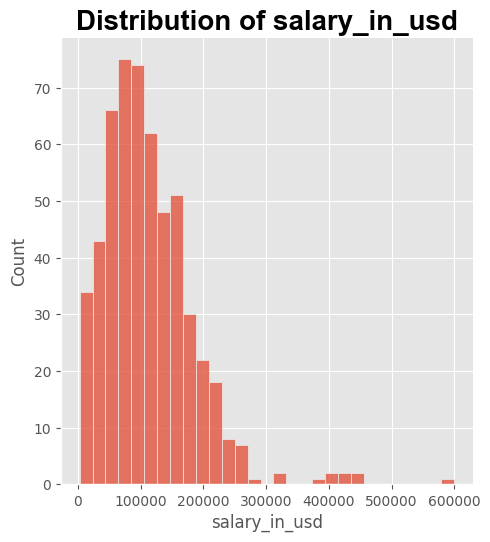

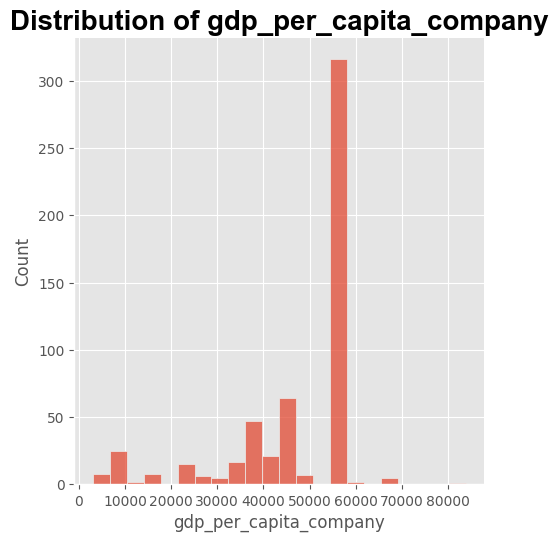

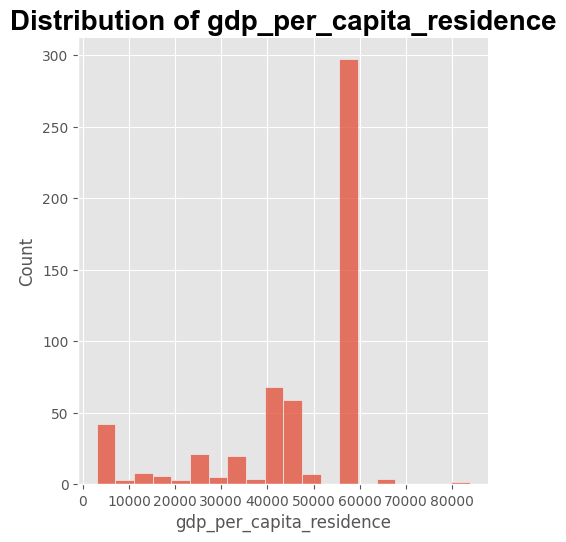

In [13]:
def vis_dist(df, col):
    variable = df[col].values
    ax = sns.displot(variable)
    plt.title(f'Distribution of {col}', fontsize=20, fontname="Arial",fontweight='bold')
    plt.xlabel(f'{col}')
    return plt.show()

num.remove('job_title')
for col in num:
    vis_dist(df3, col)


# <b>2.0 <span style='color:red'>|</span> Modelling </b> <a class="anchor" id="2.0"></a>


# <b>2.1 <span style='color:red'>|</span> Import Modelling Packages </b> <a class="anchor" id="2.1"></a>


Let's import a bunch of packages for modelling

In [14]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import scipy as sp
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression


# <b>2.2 <span style='color:red'>|</span> Define Nested Grid Search Functions </b> <a class="anchor" id="2.2"></a>

Here is the illustration of how we can find a unique combination of PRE-PROCESSORS by using PARAM GRID. The idea is to FIND the BEST TREATMENT for your data with the objective to maximise the metric, such as R2. Then, in each loop, we will also tune the regressor estimator by using Halving Grid Search CV. 

In [15]:
tuned_model = None
target_transformers = [TransformedTargetRegressor(regressor=tuned_model, 
                           func=np.log10, 
                           inverse_func=sp.special.exp10),
                       TransformedTargetRegressor(regressor=tuned_model)]

categorical_transformers = [OneHotEncoder(handle_unknown='ignore'), 
                            OrdinalEncoder()]

scaling_transformers = [Normalizer(), 
                        StandardScaler()]

param_grid = {'target_transformers':target_transformers,
              'categorical_transformers':categorical_transformers,
              'scaling_transformers':scaling_transformers}
grid = ParameterGrid(param_grid)

for n, para in enumerate(grid, start=1):
    print(n)
    print(para)
    print()

1
{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>)}

2
{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor()}

3
{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>)}

4
{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor()}

5
{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>)}

6
{'categorical_transformers': OrdinalEncoder(), 

In [16]:
target_transformers = [TransformedTargetRegressor(regressor=tuned_model, 
                           func=np.log10, 
                           inverse_func=sp.special.exp10),
                       TransformedTargetRegressor(regressor=tuned_model)]

categorical_transformers = [OneHotEncoder(handle_unknown='ignore'), 
                            OrdinalEncoder()]

scaling_transformers = [Normalizer(), 
                        StandardScaler()]

param_grid = {'target_transformers':target_transformers,
              'categorical_transformers':categorical_transformers,
              'scaling_transformers':scaling_transformers}
grid = ParameterGrid(param_grid)

def assembling_model(categorical_transform, scale_transform,  \
                     X,  y, reg, param_distributions, tune):
        
    preprocessor = make_column_transformer(
        (categorical_transform, categorical_columns),
        (scale_transform, numerical_columns),
    )
    
    x_transform = preprocessor.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(x_transform, y, random_state=42)
    if tune:
        search = HalvingGridSearchCV(reg, param_distributions, random_state=42)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        best_param = search.best_params_
    else:
        search = reg
        search.fit(X_train, y_train)
        best_model = reg
        best_param = None
    return best_model, X_train, X_test, y_train, y_test, best_param, preprocessor

def tuning_whole_algorithm(X,  y, reg, param_distributions, grid, tune=True):
    result_list = []
    for para in tqdm(grid):
        tuned_model, X_train, X_test, y_train, y_test, parameters, preprocessor_pipe = assembling_model(para['categorical_transformers'], para['scaling_transformers'], \
                         X,  y, reg, param_distributions, tune)
        
        para['target_transformers'].regressor = tuned_model
        model = para['target_transformers']
        
        # storing pipeline information
        pipeline_cache = make_pipeline(preprocessor_pipe, model)
        
        model.fit(X_train, y_train)
        prediction_test = model.predict(X_test)
        model_text_list=[]; metric_list=[]; score_list=[] ; param_list=[] ; preprocessors_list=[] ; pipelines_list = []

        # create list of metric to be examined
        metric_functions = [r2_score, r2_score, mean_squared_error,mean_squared_error,mean_absolute_error]
        metric_functions_text = ['R_Squared', 'Adj_R_Squared', 'MSE','RMSE','MAE']

        # for loop of each of the 5 metrics
        for metric_function, metric_function_text in zip(metric_functions, metric_functions_text):
            if metric_function_text == 'Adj_R_Squared':
                Adj_r2 = 1 - (1-r2_score(y_test, prediction_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
                model_text_list.append(type(model.regressor).__name__); metric_list.append(metric_function_text); score_list.append(Adj_r2); param_list.append(parameters); preprocessors_list.append(para); pipelines_list.append(pipeline_cache)
            elif metric_function_text == 'RMSE':
                rmse = mean_squared_error(y_test, prediction_test, squared=False)
                model_text_list.append(type(model.regressor).__name__); metric_list.append(metric_function_text); score_list.append(rmse); param_list.append(parameters) ; preprocessors_list.append(para); pipelines_list.append(pipeline_cache)
            else:
                model_text_list.append(type(model.regressor).__name__); metric_list.append(metric_function_text); score_list.append(metric_function(y_test, prediction_test)); param_list.append(parameters) ; preprocessors_list.append(para); pipelines_list.append(pipeline_cache)

        d = {'model':model_text_list,'preprocessors':preprocessors_list ,'parameters': param_list ,'metric': metric_list, 'test predict score': score_list, 'Pipelines': pipelines_list}
        df = pd.DataFrame(data=d)
        result_list.append(df)
    df2 = pd.concat(result_list).reset_index(drop=True)
    return df2

# <b>2.3 <span style='color:red'>|</span> Define Residual Plotting Functions </b> <a class="anchor" id="2.3"></a>


In [17]:
def residual(model,model_name,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    
    # PERFORMANCE METRICS
    mse_test = mean_squared_error(y_test, prediction_test, squared=True)
    rmse_test = mean_squared_error(y_test, prediction_test, squared=False)
    mse_train = mean_squared_error(y_train, prediction_train, squared=True)
    rmse_train = mean_squared_error(y_train, prediction_train, squared=False)
    
    # RESIDUAL FOR ACTUAL AND LOGGED
    residual_train = y_train - prediction_train
    residual_test = y_test - prediction_test
    
    fig, axs = plt.subplots(nrows = 1, ncols = 2)
    fig = matplotlib.pyplot.gcf()
    fig.subplots_adjust(wspace=0.1)
    fig.set_size_inches(12, 5)
    fig.suptitle(f"Residual of Calibrated {model_name}", fontsize=14,fontweight='bold')

    axs[0].sharex(axs[1])
    axs[0].sharey(axs[1])

    axs[0].scatter(x = prediction_train,y = residual_train, alpha=0.1,color='red',label='Train Set')
    axs[0].set_title(f'Training Set',fontweight='bold')
    axs[0].set_xlabel('Predicted Values')
    axs[0].set_ylabel('Residual')
    yabs_max = abs(max(axs[0].get_ylim(), key=abs))
    axs[0].axhline(y=0, color='black', linestyle='--', label='Zero Residual')
    axs[0].legend()
    
    axs[1].scatter(x = prediction_test,y = residual_test, alpha=0.1,color='blue',label='Test Set')
    axs[1].set_title(f'Testing Set',fontweight='bold')
    axs[1].set_xlabel('Predicted Values')
    yabs_max = abs(max(axs[1].get_ylim(), key=abs))
    axs[1].axhline(y=0, color='black', linestyle='--', label='Zero Residual')
    axs[1].legend()

    props = dict(boxstyle='square', facecolor='whitesmoke', alpha=1, pad=0.5)
    axs[0].text(0.6, 0.75, f"MSE = {mse_train:.2f} \nRMSE = {rmse_train:.2f}", transform=axs[0].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
    axs[1].text(0.6, 0.75, f"MSE = {mse_test:.2f} \nRMSE = {rmse_test:.2f}", transform=axs[1].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
    return plt.show()


def get_best_model(df):
    df_t = df[df.metric== 'Adj_R_Squared']
    bestmodel = df_t.loc[df_t['test predict score'].idxmax()].Pipelines
    model_name = df_t.loc[df_t['test predict score'].idxmax()].model
    return bestmodel, model_name

def get_best_result(df_result):
    df_result_t = df_result[df_result.metric== 'R_Squared']
    r2_df = df_result_t.loc[df_result_t['test predict score'].idxmax()].to_frame().T

    df_result_t = df_result[df_result.metric== 'Adj_R_Squared']
    adjr2_df = df_result_t.loc[df_result_t['test predict score'].idxmax()].to_frame().T
    
    df_result_t = df_result[df_result.metric== 'MSE']
    mse_df = df_result_t.loc[df_result_t['test predict score'].idxmin()].to_frame().T

    df_result_t = df_result[df_result.metric== 'RMSE']
    rmse_df = df_result_t.loc[df_result_t['test predict score'].idxmin()].to_frame().T
    
    df_result_t = df_result[df_result.metric== 'MAE']
    mae_df = df_result_t.loc[df_result_t['test predict score'].idxmin()].to_frame().T
    return pd.concat([r2_df,adjr2_df,mse_df,rmse_df,mae_df])

In [18]:
X = df3.drop('salary_in_usd', axis=1)
y = df3.salary_in_usd.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

categorical_columns = ['job_title']
numerical_columns = X.columns.tolist()
numerical_columns.remove('job_title')
numerical_columns

['gdp_per_capita_company',
 'gdp_per_capita_residence',
 'work_year_2020',
 'work_year_2021',
 'work_year_2022',
 'experience_level_Entry-level',
 'experience_level_Expert',
 'experience_level_Mid-level',
 'experience_level_Senior-level',
 'employment_type_Contract',
 'employment_type_Freelance',
 'employment_type_Full-time',
 'employment_type_Part-time',
 'remote_ratio_0',
 'remote_ratio_50',
 'remote_ratio_100',
 'company_size_L',
 'company_size_M',
 'company_size_S',
 'same_working_country_Expatriate',
 'same_working_country_Local Worker',
 'went_high_went_low_gdp_capita_Same',
 'went_high_went_low_gdp_capita_Went Higher GDP per Capita',
 'went_high_went_low_gdp_capita_Went Lower GDP per Capita',
 'is_managerial_False',
 'is_managerial_True']

# <b>2.4 <span style='color:red'>|</span> Modelling - Training + Evaluations </b> <a class="anchor" id="2.4"></a>


### <b>2.4.1 <span style='color:red'>|</span> LinearRegression </b> <a class="anchor" id="1.1"></a>


100%|██████████| 8/8 [00:00<00:00, 52.09it/s]


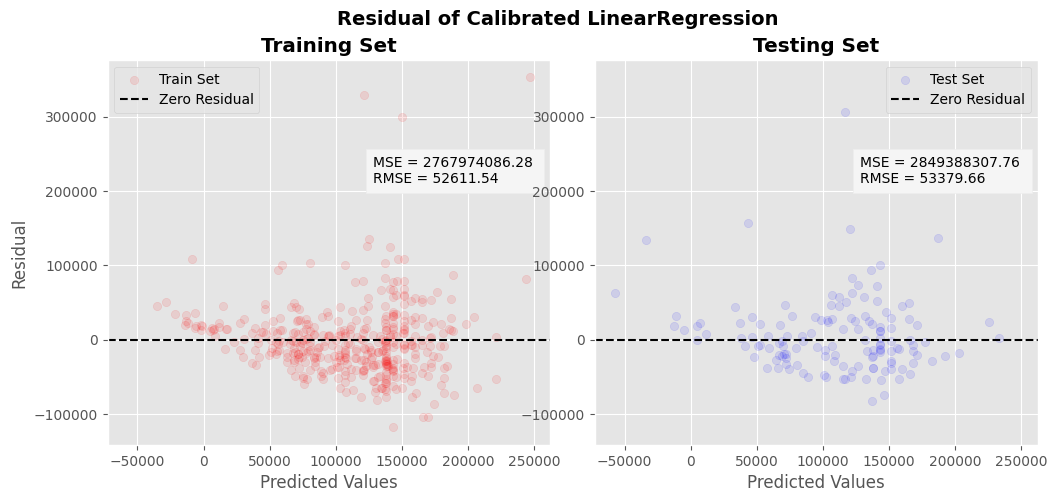

,model,preprocessors,parameters,metric,test predict score,Pipelines
35,LinearRegression,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=LinearRegression())}",None,R_Squared,0.446431,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
36,LinearRegression,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=LinearRegression())}",None,Adj_R_Squared,0.417743,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
37,LinearRegression,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=LinearRegression())}",None,MSE,2849388307.757074,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
38,LinearRegression,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=LinearRegression())}",None,RMSE,53379.66193,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
34,LinearRegression,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...",None,MAE,34349.756666,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."


In [19]:
reg = LinearRegression()
param_distributions = None
pd.set_option('display.max_colwidth', 200)
df_result_lr = tuning_whole_algorithm(X,  y, reg, param_distributions, grid, tune=False)

# visualise residual
bestmodel, model_name = get_best_model(df_result_lr)
residual(bestmodel, model_name,X_train,X_test,y_train,y_test)

# show result
get_best_result(df_result_lr)

### <b>2.4.2 <span style='color:red'>|</span> Ridge </b> <a class="anchor" id="1.1"></a>


100%|██████████| 8/8 [00:00<00:00, 73.66it/s]


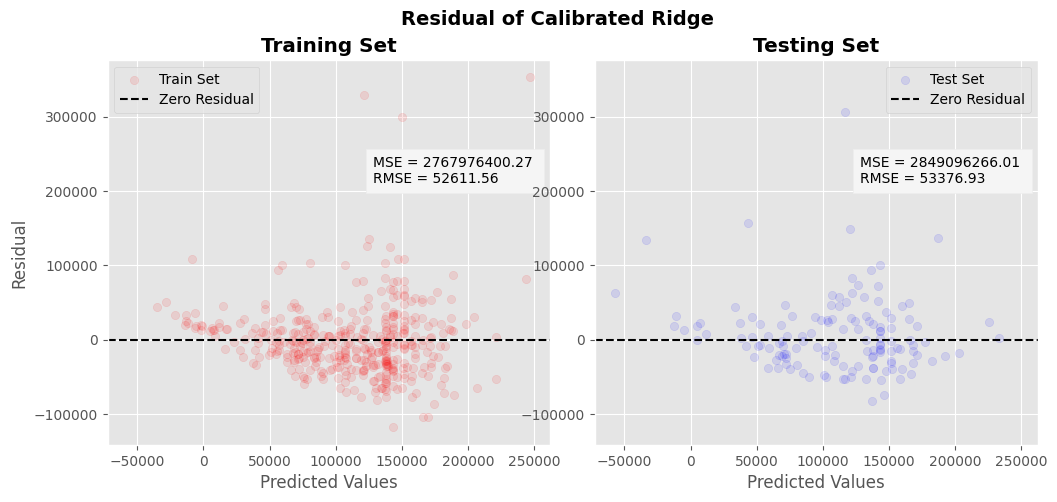

,model,preprocessors,parameters,metric,test predict score,Pipelines
35,Ridge,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=Ridge(alpha=0.5))}",None,R_Squared,0.44649,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
36,Ridge,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=Ridge(alpha=0.5))}",None,Adj_R_Squared,0.417805,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
37,Ridge,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=Ridge(alpha=0.5))}",None,MSE,2849082426.504539,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
38,Ridge,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=Ridge(alpha=0.5))}",None,RMSE,53376.796705,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
34,Ridge,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...",None,MAE,34338.034715,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."


In [20]:
reg = Ridge(alpha=.5)

param_distributions = None

df_result_ridge = tuning_whole_algorithm(X,  y, reg, param_distributions, grid, tune=False)

# visualise residual
bestmodel, model_name = get_best_model(df_result_ridge)
residual(bestmodel, model_name,X_train,X_test,y_train,y_test)

# show result
get_best_result(df_result_ridge)

### <b>2.4.3 <span style='color:red'>|</span> Lasso </b> <a class="anchor" id="1.1"></a>


100%|██████████| 8/8 [00:00<00:00, 47.73it/s]


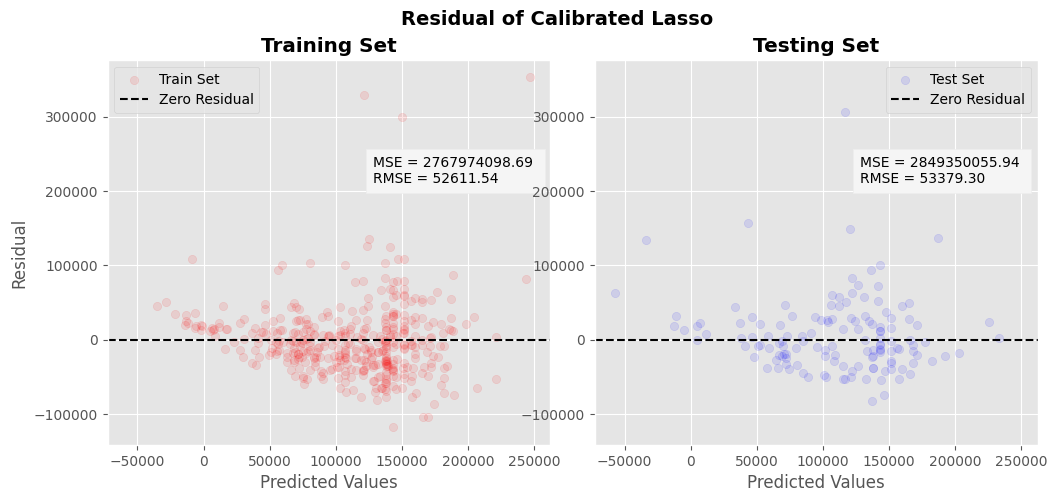

,model,preprocessors,parameters,metric,test predict score,Pipelines
35,Lasso,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=Lasso(alpha=0.1, tol=0.2))}",None,R_Squared,0.446438,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
36,Lasso,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=Lasso(alpha=0.1, tol=0.2))}",None,Adj_R_Squared,0.417751,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
37,Lasso,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=Lasso(alpha=0.1, tol=0.2))}",None,MSE,2849348861.465097,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
38,Lasso,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=Lasso(alpha=0.1, tol=0.2))}",None,RMSE,53379.292441,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
39,Lasso,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=Lasso(alpha=0.1, tol=0.2))}",None,MAE,35384.007357,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."


In [21]:
reg = Lasso(alpha=0.1, tol = 0.2)

param_distributions = None

df_result_lasso = tuning_whole_algorithm(X,  y, reg, param_distributions, grid, tune=False)

# visualise residual
bestmodel, model_name = get_best_model(df_result_lasso)
residual(bestmodel, model_name,X_train,X_test,y_train,y_test)

# show result
get_best_result(df_result_lasso)

### <b>2.4.4 <span style='color:red'>|</span> KNeighborsRegressor </b> <a class="anchor" id="1.1"></a>


100%|██████████| 8/8 [00:02<00:00,  2.81it/s]


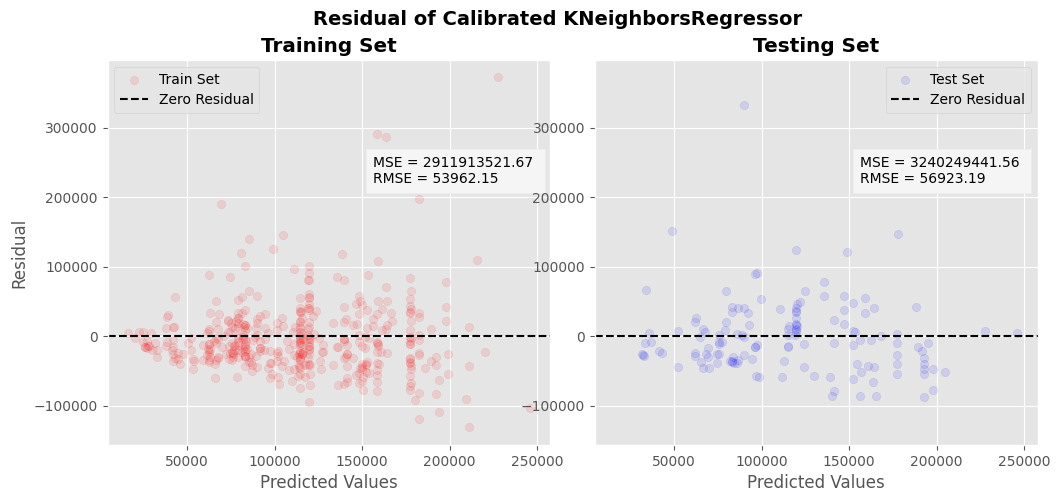

,model,preprocessors,parameters,metric,test predict score,Pipelines
15,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=KNeighborsRegressor(n_nei...","{'n_neighbors': 13, 'weights': 'uniform'}",R_Squared,0.377135,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
16,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=KNeighborsRegressor(n_nei...","{'n_neighbors': 13, 'weights': 'uniform'}",Adj_R_Squared,0.344856,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
17,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=KNeighborsRegressor(n_nei...","{'n_neighbors': 13, 'weights': 'uniform'}",MSE,3206071209.435512,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
18,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=KNeighborsRegressor(n_nei...","{'n_neighbors': 13, 'weights': 'uniform'}",RMSE,56622.179483,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
19,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=KNeighborsRegressor(n_nei...","{'n_neighbors': 13, 'weights': 'uniform'}",MAE,38066.419732,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."


In [22]:
reg = KNeighborsRegressor()

param_distributions = {'n_neighbors': [5, 7, 9, 13], 'weights': ['uniform', 'distance']}
df_result_knn = tuning_whole_algorithm(X,  y, reg, param_distributions, grid, tune=True)

# visualise residual
bestmodel, model_name = get_best_model(df_result_knn)
residual(bestmodel, model_name,X_train,X_test,y_train,y_test)

# show result
get_best_result(df_result_knn)

### <b>2.4.5 <span style='color:red'>|</span> SVR </b> <a class="anchor" id="1.1"></a>


100%|██████████| 8/8 [00:03<00:00,  2.37it/s]


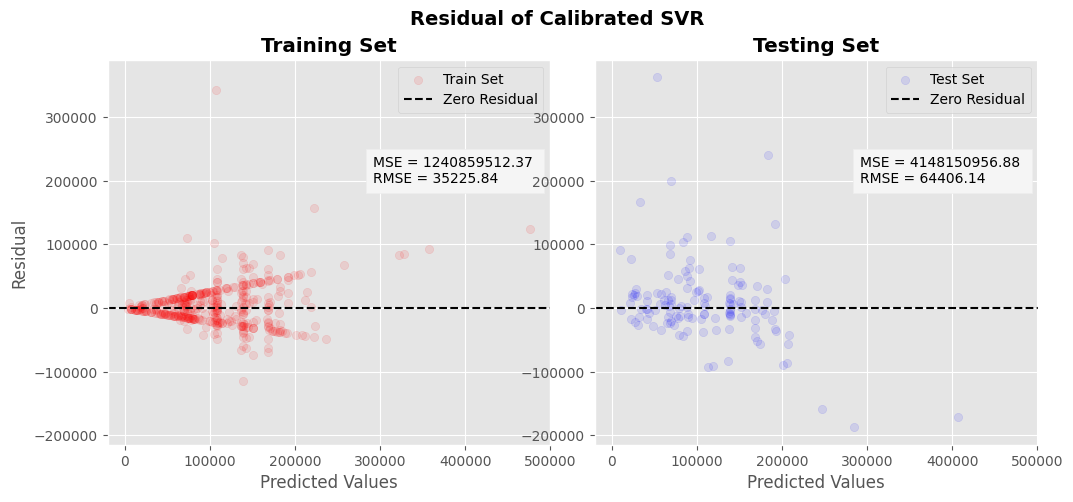

,model,preprocessors,parameters,metric,test predict score,Pipelines
10,SVR,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=...","{'C': 400, 'kernel': 'rbf'}",R_Squared,0.193734,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
11,SVR,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=...","{'C': 400, 'kernel': 'rbf'}",Adj_R_Squared,0.151951,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
12,SVR,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=...","{'C': 400, 'kernel': 'rbf'}",MSE,4150093528.74995,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
13,SVR,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=...","{'C': 400, 'kernel': 'rbf'}",RMSE,64421.219553,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
14,SVR,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=...","{'C': 400, 'kernel': 'rbf'}",MAE,39276.187139,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."


In [23]:
reg = SVR()
param_distributions = {'kernel': ['rbf','poly'],'C':[50,100,200,300,400]}

df_result_svr = tuning_whole_algorithm(X,  y, reg, param_distributions, grid)

# visualise residual
bestmodel, model_name = get_best_model(df_result_svr)
residual(bestmodel, model_name,X_train,X_test,y_train,y_test)

# show result
get_best_result(df_result_svr)

### <b>2.4.6 <span style='color:red'>|</span> DecisionTreeRegressor </b> <a class="anchor" id="1.1"></a>


100%|██████████| 8/8 [00:01<00:00,  5.75it/s]


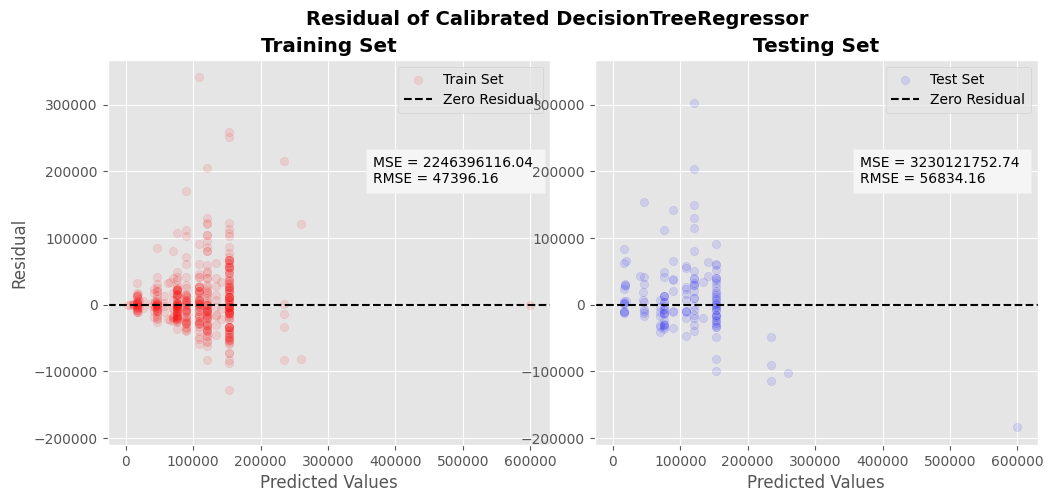

,model,preprocessors,parameters,metric,test predict score,Pipelines
30,DecisionTreeRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...","{'max_depth': 5, 'min_samples_split': 2}",R_Squared,0.372463,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
31,DecisionTreeRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...","{'max_depth': 5, 'min_samples_split': 2}",Adj_R_Squared,0.339942,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
32,DecisionTreeRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...","{'max_depth': 5, 'min_samples_split': 2}",MSE,3230121752.743833,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
33,DecisionTreeRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...","{'max_depth': 5, 'min_samples_split': 2}",RMSE,56834.160087,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
14,DecisionTreeRegressor,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=...","{'max_depth': 3, 'min_samples_split': 2}",MAE,35787.580699,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."


In [24]:
reg = DecisionTreeRegressor(random_state=42)

param_distributions = {'max_depth': [3, 5, None], 'min_samples_split': [2, 3, 5]}
df_result_dtr = tuning_whole_algorithm(X,  y, reg, param_distributions, grid)

# visualise residual
bestmodel, model_name = get_best_model(df_result_dtr)
residual(bestmodel, model_name,X_train,X_test,y_train,y_test)

# show result
get_best_result(df_result_dtr)

### <b>2.4.7 <span style='color:red'>|</span> RandomForestRegressor </b> <a class="anchor" id="1.1"></a>

100%|██████████| 8/8 [01:42<00:00, 12.77s/it]


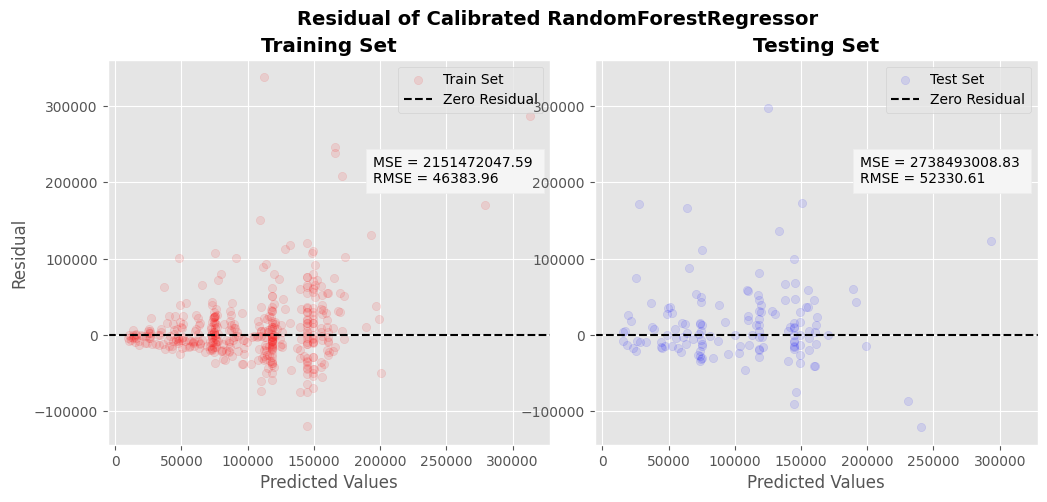

,model,preprocessors,parameters,metric,test predict score,Pipelines
30,RandomForestRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...","{'max_depth': 5, 'n_estimators': 100}",R_Squared,0.467975,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
31,RandomForestRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...","{'max_depth': 5, 'n_estimators': 100}",Adj_R_Squared,0.440404,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
32,RandomForestRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...","{'max_depth': 5, 'n_estimators': 100}",MSE,2738493008.829408,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
33,RandomForestRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...","{'max_depth': 5, 'n_estimators': 100}",RMSE,52330.61254,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
39,RandomForestRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(max_depth=5, ...","{'max_depth': 5, 'n_estimators': 100}",MAE,32689.127086,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."


In [25]:
reg = RandomForestRegressor(random_state=42)
param_distributions = {'max_depth': [3, 5, None], 'n_estimators': [100, 300]}
df_result_rfr = tuning_whole_algorithm(X,  y, reg, param_distributions, grid)

# visualise residual
bestmodel, model_name = get_best_model(df_result_rfr)
residual(bestmodel, model_name,X_train,X_test,y_train,y_test)

# show result
get_best_result(df_result_rfr)

### <b>2.4.8 <span style='color:red'>|</span> GradientBoostingRegressor </b> <a class="anchor" id="1.1"></a>


100%|██████████| 8/8 [00:14<00:00,  1.86s/it]


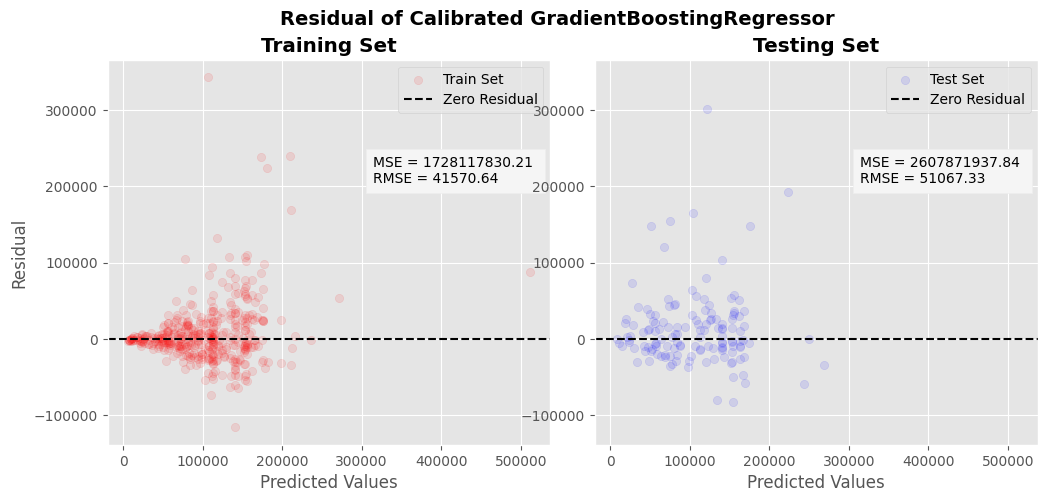

,model,preprocessors,parameters,metric,test predict score,Pipelines
20,GradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...",{'learning_rate': 0.1},R_Squared,0.493352,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('normalizer', Normalizer(),\n ..."
21,GradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...",{'learning_rate': 0.1},Adj_R_Squared,0.467095,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('normalizer', Normalizer(),\n ..."
22,GradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...",{'learning_rate': 0.1},MSE,2607871937.840297,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('normalizer', Normalizer(),\n ..."
23,GradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...",{'learning_rate': 0.1},RMSE,51067.327499,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('normalizer', Normalizer(),\n ..."
24,GradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...",{'learning_rate': 0.1},MAE,31364.680839,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('normalizer', Normalizer(),\n ..."


In [26]:
reg = GradientBoostingRegressor(random_state=42)
param_distributions = {'learning_rate': [0.1, 0.2, 0.5]}
df_result_gbr = tuning_whole_algorithm(X,  y, reg, param_distributions, grid)

# visualise residual
bestmodel, model_name = get_best_model(df_result_gbr)
residual(bestmodel, model_name,X_train,X_test,y_train,y_test)

# show result
get_best_result(df_result_gbr)

### <b>2.4.9 <span style='color:red'>|</span> HistGradientBoostingRegressor </b> <a class="anchor" id="1.1"></a>


100%|██████████| 8/8 [00:25<00:00,  3.25s/it]


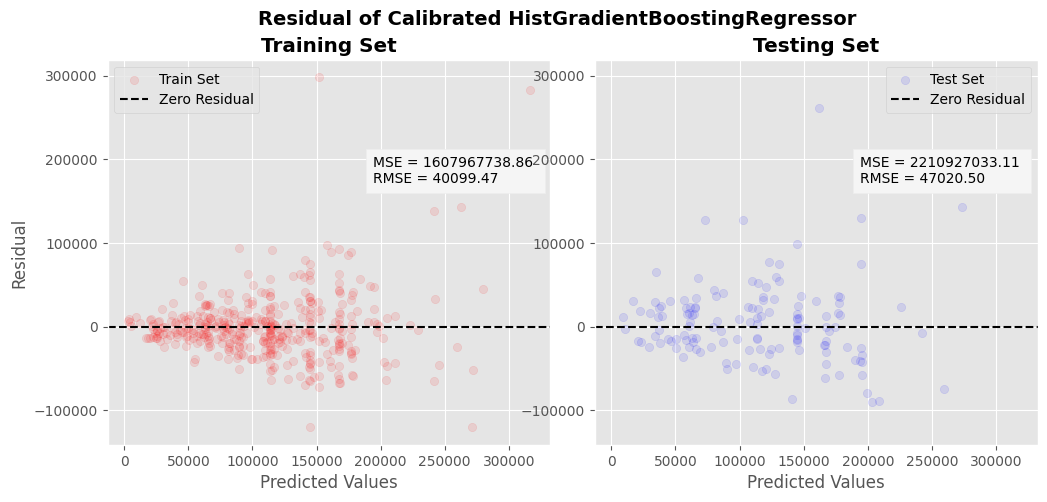

,model,preprocessors,parameters,metric,test predict score,Pipelines
35,HistGradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=HistGradientBoostingRegressor(random_state=42))}",{'learning_rate': 0.1},R_Squared,0.570469,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
36,HistGradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=HistGradientBoostingRegressor(random_state=42))}",{'learning_rate': 0.1},Adj_R_Squared,0.548209,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
37,HistGradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=HistGradientBoostingRegressor(random_state=42))}",{'learning_rate': 0.1},MSE,2210927033.107597,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
38,HistGradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=HistGradientBoostingRegressor(random_state=42))}",{'learning_rate': 0.1},RMSE,47020.495883,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
34,HistGradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...",{'learning_rate': 0.1},MAE,32775.805351,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."


In [27]:
param_distributions = {'learning_rate': [0.1, 0.2, 0.5]}

reg = HistGradientBoostingRegressor(random_state=42)
df_result_hgb = tuning_whole_algorithm(X,  y, reg, param_distributions, grid)

# visualise residual
bestmodel, model_name = get_best_model(df_result_hgb)
residual(bestmodel, model_name,X_train,X_test,y_train,y_test)

# show result
get_best_result(df_result_hgb)

### <b>2.4.10 <span style='color:red'>|</span> AdaBoostRegressor </b> <a class="anchor" id="1.1"></a>


100%|██████████| 8/8 [00:00<00:00, 10.55it/s]


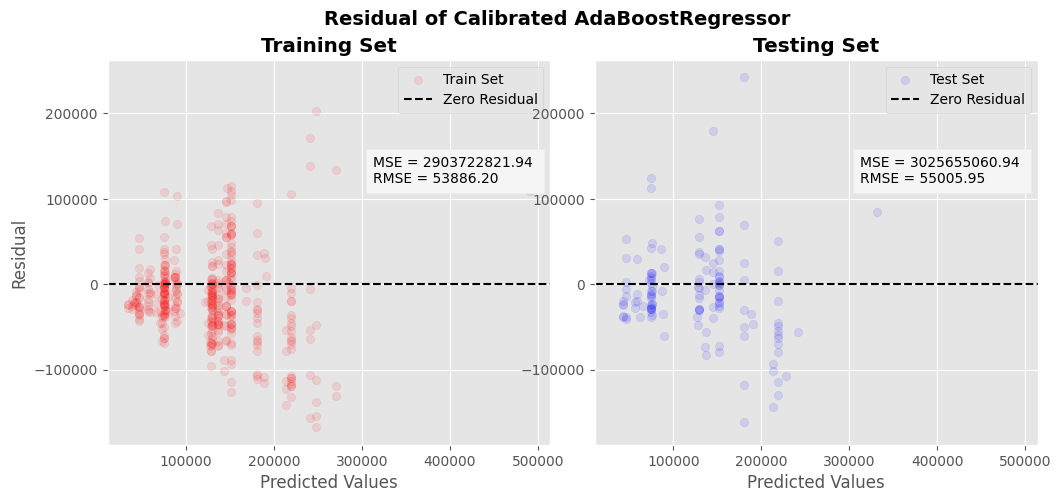

,model,preprocessors,parameters,metric,test predict score,Pipelines
25,AdaBoostRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",None,R_Squared,0.412186,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('normalizer', Normalizer(),\n ..."
26,AdaBoostRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",None,Adj_R_Squared,0.381724,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('normalizer', Normalizer(),\n ..."
27,AdaBoostRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",None,MSE,3025655060.944589,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('normalizer', Normalizer(),\n ..."
28,AdaBoostRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",None,RMSE,55005.954777,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('normalizer', Normalizer(),\n ..."
29,AdaBoostRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",None,MAE,39521.322597,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('normalizer', Normalizer(),\n ..."


In [28]:
reg = AdaBoostRegressor(random_state=42)
df_result_ada = tuning_whole_algorithm(X,  y, reg, None, grid, tune=False)
# visualise residual
bestmodel, model_name = get_best_model(df_result_ada)
residual(bestmodel, model_name,X_train,X_test,y_train,y_test)

# show result
get_best_result(df_result_ada)

# <b>2.5 <span style='color:red'>|</span> Concatenate Results </b> <a class="anchor" id="2.5"></a>


In [29]:
df_result = pd.concat([df_result_lr, df_result_ridge, df_result_lasso, 
                       df_result_knn, df_result_svr, df_result_dtr,
                       df_result_rfr, df_result_hgb, df_result_gbr,
                       df_result_ada]).reset_index(drop=True)
df_result

,model,preprocessors,parameters,metric,test predict score,Pipelines
0,LinearRegression,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufu...",None,R_Squared,9.538689e-02,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
1,LinearRegression,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufu...",None,Adj_R_Squared,4.850674e-02,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
2,LinearRegression,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufu...",None,MSE,4.656315e+09,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
3,LinearRegression,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufu...",None,RMSE,6.823720e+04,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
4,LinearRegression,"{'categorical_transformers': OneHotEncoder(handle_unknown='ignore'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufu...",None,MAE,4.481856e+04,"(ColumnTransformer(transformers=[('onehotencoder',\n OneHotEncoder(handle_unknown='ignore'),\n ['job_title']),\n ..."
...,...,...,...,...,...,...
395,AdaBoostRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",None,R_Squared,3.685396e-01,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
396,AdaBoostRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",None,Adj_R_Squared,3.358152e-01,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
397,AdaBoostRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",None,MSE,3.250316e+09,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
398,AdaBoostRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",None,RMSE,5.701155e+04,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."


In [32]:
df_result['metric'].values

array(['R_Squared', 'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE', 'R_Squared',
       'Adj_R_Squared', 'MSE', 'RMSE', 'MAE

# <b>2.6 <span style='color:red'>|</span> Get Overall Best Results </b> <a class="anchor" id="2.6"></a>


In [30]:
get_best_result(df_result)

,model,preprocessors,parameters,metric,test predict score,Pipelines
315,HistGradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",{'learning_rate': 0.1},R_Squared,0.570469,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
316,HistGradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",{'learning_rate': 0.1},Adj_R_Squared,0.548209,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
317,HistGradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",{'learning_rate': 0.1},MSE,2210927033.107597,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
318,HistGradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=AdaBoostRegressor(random_state=42))}",{'learning_rate': 0.1},RMSE,47020.495883,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('standardscaler', StandardScaler(),\n ..."
344,GradientBoostingRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, ...",{'learning_rate': 0.1},MAE,31364.680839,"(ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),\n ['job_title']),\n ('normalizer', Normalizer(),\n ..."


# <b>2.7 <span style='color:red'>|</span> Make a Final Prediction </b> <a class="anchor" id="2.7"></a>


In [31]:
df_result_t = df_result[df_result.metric== 'Adj_R_Squared']
BEST_model = df_result_t.loc[df_result_t['test predict score'].idxmax()].Pipelines.fit(X_train, y_train)

print('PREDICTED VALUES')
best_predict = BEST_model.predict(X_test)
pd.DataFrame({'Actual Y-Test Salary':y_test, 'Best Predicted Salary':best_predict})

PREDICTED VALUES


,Actual Y-Test Salary,Best Predicted Salary
0,61467,84757.811111
1,140000,212562.765432
2,48000,84217.836735
3,113476,102204.192308
4,157000,286659.503759
...,...,...
133,39263,84217.836735
134,42197,83623.976744
135,85000,83623.976744
136,184700,135672.231405


As a conclusion, this notebook has shown 10 regressor made up with parametric, non-parametric and ensemble methods to predict on data science salary. It has also shown how to tuned the pre-processor along with the estimator parameters. The best model can be retrieved at the end to make a final prediction. Hope you enjoy reading this, if you like this notebook, please upvote and comment. Thank you.

Author: Morris Lee <br>
Date: 4-9-2022